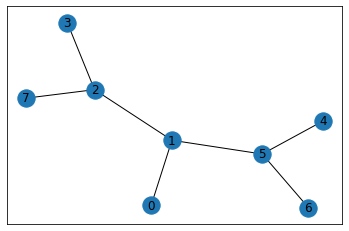

In [4]:
import numpy as np
import pylab as plt
import networkx as nx
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7
state = 0
gamma = 0.8
graph = nx.Graph()
graph.add_edges_from(points_list)
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph,pos)
plt.show()

In [5]:
states = np.matrix(np.ones(shape=(8, 8)))
states *= -1
for point in points_list:
    if point[1] == goal:
        states[point] = 100
    else:
        states[point] = 0
    if point[0] != goal:
        states[point[::-1]] = 0
    states[7, 7] = 100
print(states)

[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]]


In [6]:
q_values = np.matrix(np.zeros([8, 8]))

def legal_actions(state):
    current_state = states[state,]
    return np.where(current_state >= 0)[1]

possible_actions = legal_actions(0)

def choose_action(p_actions):
    return int(np.random.choice(possible_actions))

action = choose_action(possible_actions)

def calc_q_values(state, action, gamma):
    q_values[state, action] = states[state, action] + gamma * np.max(q_values[action,])
    



    
    
    



In [7]:
for i in range(10000):
    state = np.random.randint(0, 7)
    possible_actions = legal_actions(state)
    action = choose_action(possible_actions)
    calc_q_values(state, action, gamma)

print(q_values)



[[  0.    64.     0.     0.     0.     0.     0.     0.  ]
 [ 51.2    0.    80.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.    64.     0.     0.     0.   100.  ]
 [  0.     0.    80.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.     0.    40.96   0.    40.96   0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.  ]]


In [8]:
current_state = 6
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(q_values[current_state,] == np.max(q_values[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[6, 5, 1, 2, 7]
